# Einops visual examples

## Preparations

In [7]:
import numpy as np
from PIL.Image import fromarray
from IPython import get_ipython
from IPython.display import display_html

from einops import rearrange as ei_rearrange, repeat
from einops_rearrange import rearrange

In [8]:
def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print("<array of shape {}>".format(obj.shape))

    get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)

In [9]:
display_np_arrays_as_images()

## Load a batch of images to play with

In [10]:
ims = np.load("test_images.npy", allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


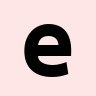

In [11]:
# display the first image (whole 4d tensor can't be rendered)
ims[0]

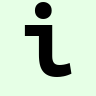

In [12]:
# second image in a batch
ims[1]

[([], [0]), ([], [1]), ([], [2])]
++++++++++++++++++++++++++++++
OrderedDict({'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[1, 0, 2]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'h': 0, 'w': 1, 'c': 2}
++++++++++++++++++++++++++++++
[['w'], ['h'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(96), np.int64(3)]
None
[1, 0, 2]


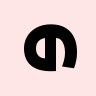

In [13]:
# rearrange, as the name suggests, rearranges elements
# below we swapped height and width.
# In other words, transposed first two axes (dimensions)
rearrange(ims[0], "h w c -> w h c")

[([], [0]), ([], [1]), ([], [2])]
++++++++++++++++++++++++++++++
OrderedDict({'height': -1, 'width': -1, 'color': -1})
++++++++++++++++++++++++++++++
[1, 0, 2]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'height': 0, 'width': 1, 'color': 2}
++++++++++++++++++++++++++++++
[['width'], ['height'], ['color']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(96), np.int64(3)]
None
[1, 0, 2]


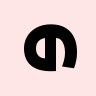

In [14]:
# we could use more verbose names for axes, and result is the same:
rearrange(ims[0], "height width color -> width height color")
# when you operate on same set of axes many times,
# you usually come up with short names.
# That's what we do throughout tutorial - we'll use b (for batch), h, w, and c

## Composition of axes
transposition is very common and useful, but let's move to other capabilities provided by einops

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[0, 1, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['b', 'h'], ['w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(576), np.int64(96), np.int64(3)]
None
[0, 1, 2, 3]


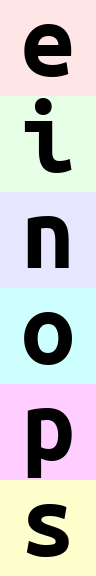

In [15]:
# einops allows seamlessly composing batch and height to a new height dimension
# We just rendered all images by collapsing to 3d tensor!
rearrange(ims, "b h w c -> (b h) w c")

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[1, 0, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['h'], ['b', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
None
[1, 0, 2, 3]


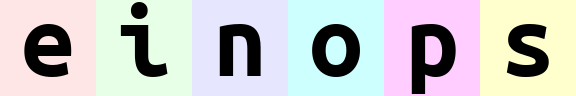

In [16]:
# or compose a new dimension of batch and width
rearrange(ims, "b h w c -> h (b w) c")

In [17]:
# resulting dimensions are computed very simply
# length of newly composed axis is a product of components
# [6, 96, 96, 3] -> [96, (6 * 96), 3]
rearrange(ims, "b h w c -> h (b w) c").shape

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[1, 0, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['h'], ['b', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
None
[1, 0, 2, 3]


(96, 576, 3)

In [18]:
# we can compose more than two axes.
# let's flatten 4d array into 1d, resulting array has as many elements as the original
rearrange(ims, "b h w c -> (b h w c)").shape

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[0, 1, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['b', 'h', 'w', 'c']]
++++++++++++++++++++++++++++++
{}
[np.int64(165888)]
None
[0, 1, 2, 3]


(165888,)

## Decomposition of axis

In [19]:
ims.shape

(6, 96, 96, 3)

In [20]:
# decomposition is the inverse process - represent an axis as a combination of new axes
# several decompositions possible, so b1=2 is to decompose 6 to b1=2 and b2=3
rearrange(ims, "(b1 b2) h w c -> b1 b2 h w c ", b1=2).shape

[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[0, 1, 2, 3, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['b1'], ['b2'], ['h'], ['w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(2), np.int64(3), np.int64(96), np.int64(96), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[0, 1, 2, 3, 4]


(2, 3, 96, 96, 3)

[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[0, 2, 1, 3, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['b1', 'h'], ['b2', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(192), np.int64(288), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[0, 2, 1, 3, 4]


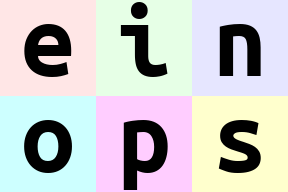

In [21]:
# finally, combine composition and decomposition:
rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c ", b1=2)

[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[1, 2, 0, 3, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['b2', 'h'], ['b1', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(288), np.int64(192), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[1, 2, 0, 3, 4]


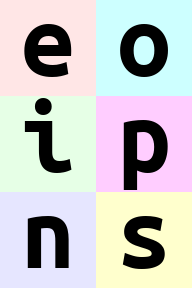

In [22]:
# slightly different composition: b1 is merged with width, b2 with height
# ... so letters are ordered by w then by h
rearrange(ims, "(b1 b2) h w c -> (b2 h) (b1 w) c ", b1=2)

[([], [0]), ([], [1]), ([3], [2]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'w2': 2, 'c': -1})
++++++++++++++++++++++++++++++
[1, 3, 0, 2, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'w2': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['h', 'w2'], ['b', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(192), np.int64(288), np.int64(3)]
[6, 96, np.int64(48), 2, 3]
[1, 3, 0, 2, 4]


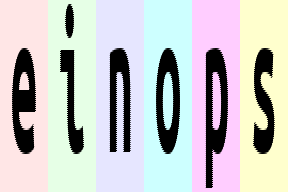

In [23]:
# move part of width dimension to height.
# we should call this width-to-height as image width shrunk by 2 and height doubled.
# but all pixels are the same!
# Can you write reverse operation (height-to-width)?
rearrange(ims, "b h (w w2) c -> (h w2) (b w) c", w2=2)

## Order of axes matters

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[1, 0, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['h'], ['b', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
None
[1, 0, 2, 3]


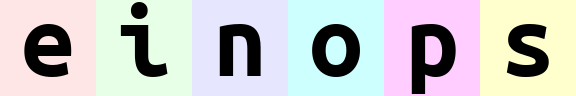

In [24]:
# compare with the next example
rearrange(ims, "b h w c -> h (b w) c")

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[1, 2, 0, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['h'], ['w', 'b'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
None
[1, 2, 0, 3]


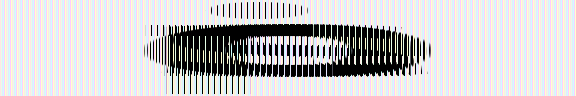

In [25]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant,
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort
rearrange(ims, "b h w c -> h (w b) c")

[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[2, 0, 1, 3, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['h'], ['b1', 'b2', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[2, 0, 1, 3, 4]
[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[2, 1, 0, 3, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['h'], ['b2', 'b1', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[2, 1, 0, 3, 4]


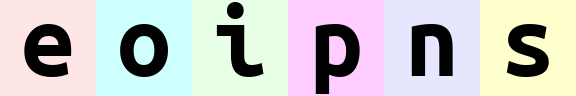

In [26]:
# what if b1 and b2 are reordered before composing to width?
rearrange(ims, "(b1 b2) h w c -> h (b1 b2 w) c ", b1=2)  # produces 'einops'
rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c ", b1=2)  # produces 'eoipns'

## Stack and concatenate

In [25]:
# rearrange can also take care of lists of arrays with the same shape
x = list(ims)
print(type(x), "with", len(x), "tensors of shape", x[0].shape)
# that's how we can stack inputs
# "list axis" becomes first ("b" in this case), and we left it there
rearrange(x, "b h w c -> b h w c").shape

<class 'list'> with 6 tensors of shape (96, 96, 3)


(6, 96, 96, 3)

In [26]:
# but new axis can appear in the other place:
rearrange(x, "b h w c -> h w c b").shape

(96, 96, 3, 6)

In [27]:
# that's equivalent to np stacking, but written more explicitly
np.array_equal(rearrange(x, "b h w c -> h w c b"), np.stack(x, axis=3))

True

In [28]:
# ... or we can concatenate along axes
rearrange(x, "b h w c -> h (b w) c").shape

(96, 576, 3)

In [29]:
# which is equivalent to concatenation
np.array_equal(rearrange(x, "b h w c -> h (b w) c"), np.concatenate(x, axis=1))

True

## Addition or removal of axes

You can write 1 to create a new axis of length 1. Similarly you can remove such axis.

There is also a synonym `()` that you can use. That's a composition of zero axes and it also has a unit length.

In [27]:
x = rearrange(ims, "b h w c -> b 1 h w 1 c")  # functionality of np.expand_dims
print(x.shape)
print(rearrange(x, "b 1 h w 1 c -> b h w c").shape)  # functionality of np.squeeze

[([], [0]), ([], [1]), ([], [2]), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[0, 1, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['b'], [], ['h'], ['w'], [], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(6), 1, np.int64(96), np.int64(96), 1, np.int64(3)]
None
[0, 1, 2, 3]
(6, 1, 96, 96, 1, 3)
[([], [0]), ([], []), ([], [1]), ([], [2]), ([], []), ([], [3])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[0, 1, 2, 3]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h': 1, 'w': 2, 'c': 3}
++++++++++++++++++++++++++++++
[['b'], ['h'], ['w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(6), np.int64(96), np.int64(96), np.int64(3)]
[6, 96, 96, 3]
[0, 1, 2, 3]
(6, 96, 96, 3)


## Repeating elements

Third operation we introduce is `repeat`

[([], [0]), ([], [1]), ([], [2])]
++++++++++++++++++++++++++++++
OrderedDict({'h': -1, 'w': -1, 'c': -1, 'repeat': 3})
++++++++++++++++++++++++++++++
[0, 1, 2]
++++++++++++++++++++++++++++++
{'repeat': 1}
++++++++++++++++++++++++++++++
{'h': 0, 'w': 1, 'c': 2, 'repeat': 3}
++++++++++++++++++++++++++++++
[['h'], ['repeat', 'w'], ['c']]
++++++++++++++++++++++++++++++
{1: 3}
[np.int64(96), np.int64(288), np.int64(3)]
None
[0, 1, 2]


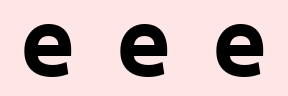

In [33]:
# repeat along w (existing axis)
# repeat(ims[0], "h w c -> h (repeat w) c", repeat=3)
rearrange(ims[0], "h w c -> h (repeat w) c", repeat=3)

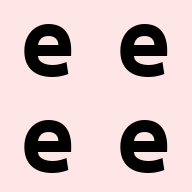

In [35]:
# repeat along two existing axes
repeat(ims[0], "h w c -> (2 h) (2 w) c")

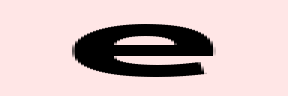

In [36]:
# order of axes matters as usual - you can repeat each element (pixel) 3 times
# by changing order in parenthesis
repeat(ims[0], "h w c -> h (w repeat) c", repeat=3)

Note: `repeat` operation covers functionality identical to `np.repeat`, `np.tile` and actually more than that.

## Reduce ⇆ repeat

reduce and repeat are like opposite of each other: first one reduces amount of elements, second one increases.

In the following example each image is repeated first, then we reduce over new axis to get back original tensor. Notice that operation patterns are "reverse" of each other

In [37]:
repeated = repeat(ims, "b h w c -> b h new_axis w c", new_axis=2)
reduced = reduce(repeated, "b h new_axis w c -> b h w c", "min")
assert np.array_equal(ims, reduced)

## Fancy examples in random order

(a.k.a. mad designer gallery)

[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[2, 0, 3, 1, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['h', 'b1'], ['w', 'b2'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(192), np.int64(288), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[2, 0, 3, 1, 4]


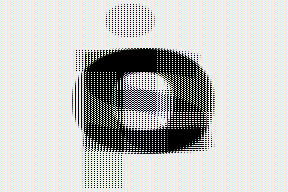

In [34]:
# interweaving pixels of different pictures
# all letters are observable
rearrange(ims, "(b1 b2) h w c -> (h b1) (w b2) c ", b1=2)

[([0], [1]), ([], [2]), ([], [3]), ([], [4])]
++++++++++++++++++++++++++++++
OrderedDict({'b1': 2, 'b2': -1, 'h': -1, 'w': -1, 'c': -1})
++++++++++++++++++++++++++++++
[2, 0, 1, 3, 4]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b1': 0, 'b2': 1, 'h': 2, 'w': 3, 'c': 4}
++++++++++++++++++++++++++++++
[['h', 'b1'], ['b2', 'w'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(192), np.int64(288), np.int64(3)]
[2, np.int64(3), 96, 96, 3]
[2, 0, 1, 3, 4]


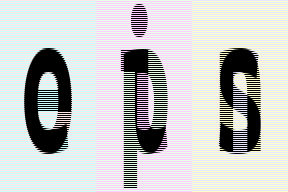

In [35]:
# interweaving along vertical for couples of images
rearrange(ims, "(b1 b2) h w c -> (h b1) (b2 w) c", b1=2)

[([], [0]), ([2], [1]), ([4], [3]), ([], [5])]
++++++++++++++++++++++++++++++
OrderedDict({'b': -1, 'h1': -1, 'h2': 8, 'w1': -1, 'w2': 8, 'c': -1})
++++++++++++++++++++++++++++++
[1, 4, 0, 3, 2, 5]
++++++++++++++++++++++++++++++
{}
++++++++++++++++++++++++++++++
{'b': 0, 'h1': 1, 'h2': 2, 'w1': 3, 'w2': 4, 'c': 5}
++++++++++++++++++++++++++++++
[['h1', 'w2'], ['b', 'w1', 'h2'], ['c']]
++++++++++++++++++++++++++++++
{}
[np.int64(96), np.int64(576), np.int64(3)]
[6, np.int64(12), 8, np.int64(12), 8, 3]
[1, 4, 0, 3, 2, 5]


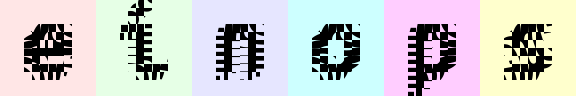

In [37]:
# split in small patches and transpose each patch
rearrange(ims, "b (h1 h2) (w1 w2) c -> (h1 w2) (b w1 h2) c", h2=8, w2=8)

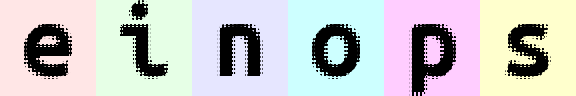

In [45]:
# stop me someone!
rearrange(ims, "b (h1 h2 h3) (w1 w2 w3) c -> (h1 w2 h3) (b w1 h2 w3) c", h2=2, w2=2, w3=2, h3=2)

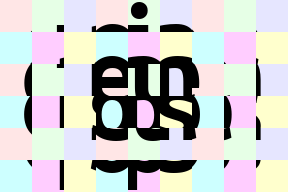

In [46]:
rearrange(ims, "(b1 b2) (h1 h2) (w1 w2) c -> (h1 b1 h2) (w1 b2 w2) c", h1=3, w1=3, b2=3)

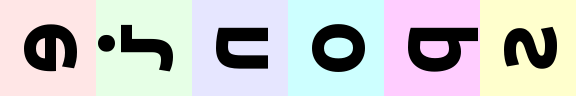

In [50]:
rearrange(ims, "b h w c -> w (b h) c")